# Project Name: Predict Loan Approval Problem

---



In the beginning I will talk about the Introduction to Possibility of loan approval 
Second, we will explain what it is Data Preprocessing and why you use it ? and what are the Data Preprocessing steps?
Finally, we will talk about the algorithms used in the project

1- An introduction to the possibility of accepting or rejecting the loan



 A financing company that deals in all real estate loans. They have a presence in all urban, semi-urban and rural areas. The customer first applies for a housing loan after the company verifies the customer's eligibility for the loan.

**What is mean Data Pre-processing ? and why you use it?**

Data Pre-processing it is one of the most important steps data mining.The way you collect data is often controlled incorrectly, result out of range for example: income= -100 , or impossible data for example: gender:male -> prednant:yes , or missing data. Analyzing data that has not been examined carefully can lead to misleading or illogical results. If a lot of data is irrelevant or unorganized. discovered during training take large amount of processing time so we uesd data preprocessing

**What are the Data Pre-processing steps?**

1-Importing The Libraries

2-Importing The Dataset

3-Missing Data

4-Encoding categorical data

5-Feature Selection

6-Feature Scaling

7-Splitting the dataset into the Training set and Test set

There are other things that you should know :-

Variance in data
Correlation in data

**The Algorithms used in the Project : -**




1.   Logistic Regression
2.   Support Vector Machine [ SVM ]
3.   K Nearest Neighbors [ KNN ]
4.   Decision Tree
5.   Random Force
5.   Naive Bayes


**Evaluation Classification Methods Performance : - [ Metrics Model ]**
1. Confusion Matrix
2. Classification Report
  - Recall 
  - Precision
  - F1 Score
3. ROC Curve && AUC [ Area Under The Curve ]

**Compare all the algorithm of the AUC**



> Importing The Libraries



In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



> Importing The Dataset



In [2]:
dataset = pd.read_csv('../input/predict-loan-approval-problem/train_u6lujuX_CVtuZ9i.csv')
print('dataset :\n',dataset.head(5))
print('-----------------------------------------------------------------------')
print('shape :',dataset.shape)
print('-----------------------------------------------------------------------')
print('columns in dataset')
print('-----------------------------------------------------------------------')
for cols in dataset.columns:
    print(cols)

dataset :
     Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2        



> Drop Unless Columns



In [3]:
dataset.drop(['Loan_ID'],axis=1,inplace=True)
print('dataset :\n',dataset.head(5))

dataset :
   Gender Married Dependents     Education Self_Employed  ApplicantIncome  \
0   Male      No          0      Graduate            No             5849   
1   Male     Yes          1      Graduate            No             4583   
2   Male     Yes          0      Graduate           Yes             3000   
3   Male     Yes          0  Not Graduate            No             2583   
4   Male      No          0      Graduate            No             6000   

   CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
0                0.0         NaN             360.0             1.0   
1             1508.0       128.0             360.0             1.0   
2                0.0        66.0             360.0             1.0   
3             2358.0       120.0             360.0             1.0   
4                0.0       141.0             360.0             1.0   

  Property_Area Loan_Status  
0         Urban           Y  
1         Rural           N  
2         Urban      



> Simple look on the data



>  First of all, we must work to show and understand the data correctly before entering it into the machine learning model

In [4]:
success = dataset[dataset['Loan_Status'].isin(['Y'])]
rejected = dataset[dataset['Loan_Status'].isin(['N'])]
print('success data : \n',success.head(5))
print('-----------------------------------------------------------------------')
print('rejected data \n',rejected.head(5))

success data : 
   Gender Married Dependents     Education Self_Employed  ApplicantIncome  \
0   Male      No          0      Graduate            No             5849   
2   Male     Yes          0      Graduate           Yes             3000   
3   Male     Yes          0  Not Graduate            No             2583   
4   Male      No          0      Graduate            No             6000   
5   Male     Yes          2      Graduate           Yes             5417   

   CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
0                0.0         NaN             360.0             1.0   
2                0.0        66.0             360.0             1.0   
3             2358.0       120.0             360.0             1.0   
4                0.0       141.0             360.0             1.0   
5             4196.0       267.0             360.0             1.0   

  Property_Area Loan_Status  
0         Urban           Y  
2         Urban           Y  
3         Urban

success : 422
rejected : 192


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


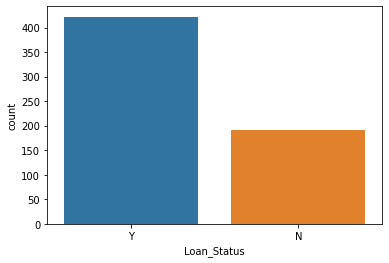

In [5]:
split = dataset.Loan_Status
success , rejected = split.value_counts()
print('success :',success)
print('rejected :',rejected)
ax = sns.countplot(split,data=dataset,label='counts')  

male : 489
female : 112


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


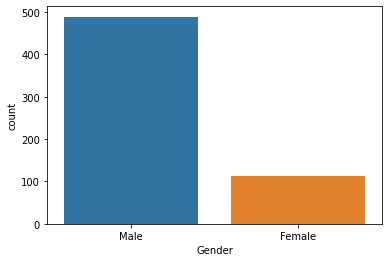

In [6]:
g = dataset.Gender
male,female = g.value_counts()
print('male :',male)
print('female :',female)
ax = sns.countplot(g,data=dataset,label='counts') 

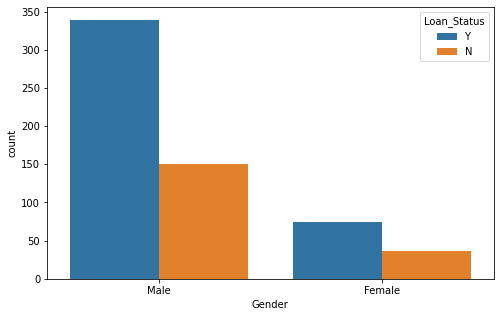

In [7]:
plt.figure(figsize=(8,5))
ax = sns.countplot(x='Gender',hue='Loan_Status',data=dataset)
plt.show()

## It is clear that this feature does not have a specific pattern
## Not Pattern

married : 398
not_married : 213


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


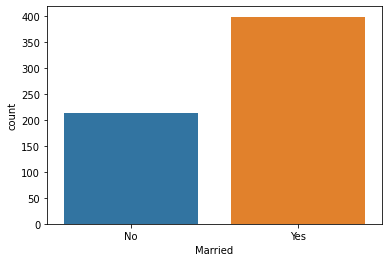

In [8]:
m = dataset.Married
married,not_married = m.value_counts()
print('married :', married)
print('not_married :', not_married)
ax = sns.countplot(m,data= dataset,label='counts')

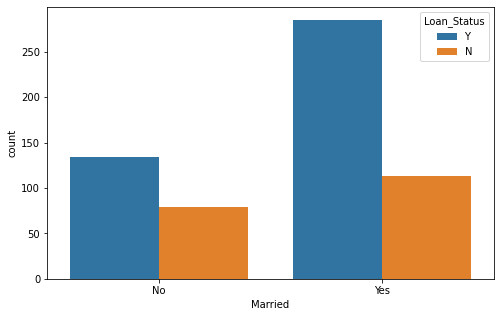

In [9]:
plt.figure(figsize=(8,5))
ax = sns.countplot(x='Married',hue='Loan_Status',data=dataset)
plt.show()

# Good Feature 

education : 480
not_education : 134


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


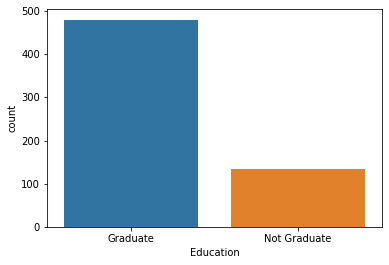

In [10]:
ed = dataset.Education
education,not_education = ed.value_counts()
print('education :', education)
print('not_education :', not_education)
ax = sns.countplot(ed,data= dataset,label='counts')

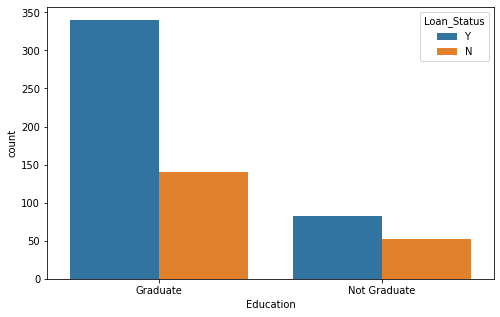

In [11]:
plt.figure(figsize=(8,5))
ax = sns.countplot(x='Education',hue='Loan_Status',data=dataset)
plt.show()

# Not Pattern

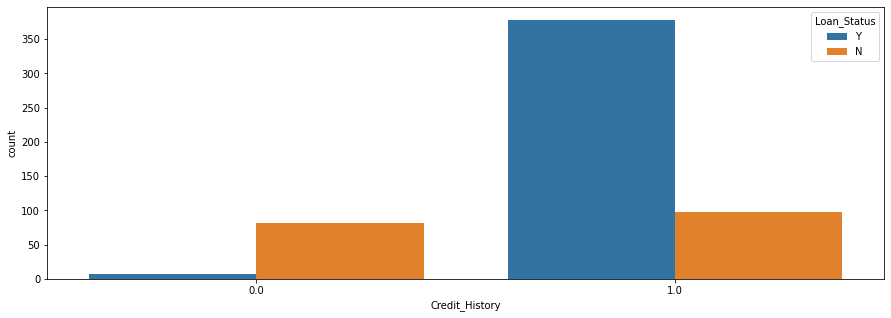

In [12]:
plt.figure(figsize=(15,5))
sns.countplot(x='Credit_History', hue='Loan_Status', data=dataset);

# important feature

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

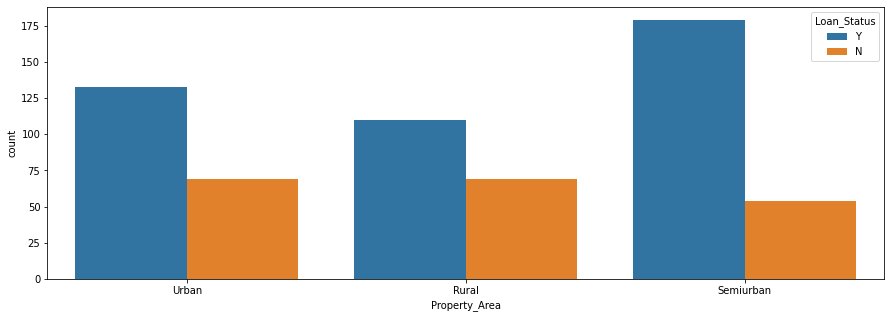

In [13]:
plt.figure(figsize=(15,5))
sns.countplot(x='Property_Area', hue='Loan_Status', data=dataset)

# important feature

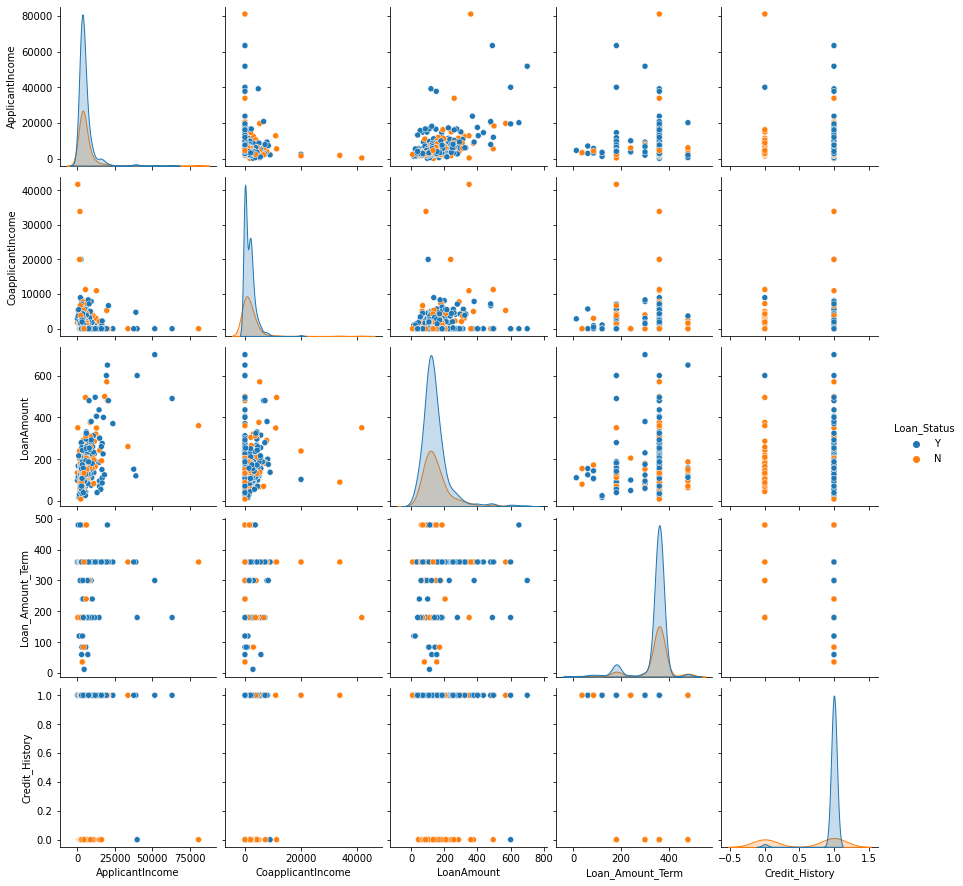

In [14]:
sns.pairplot(dataset,hue='Loan_Status')

> Show us how spread out the data is about their mean

In [15]:
dataset.var()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


ApplicantIncome      3.732039e+07
CoapplicantIncome    8.562930e+06
LoanAmount           7.325190e+03
Loan_Amount_Term     4.240668e+03
Credit_History       1.331362e-01
dtype: float64

In [16]:
dataset.std()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


ApplicantIncome      6109.041673
CoapplicantIncome    2926.248369
LoanAmount             85.587325
Loan_Amount_Term       65.120410
Credit_History          0.364878
dtype: float64

> Correlation In Data

In [17]:
dataset.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000


<AxesSubplot:>

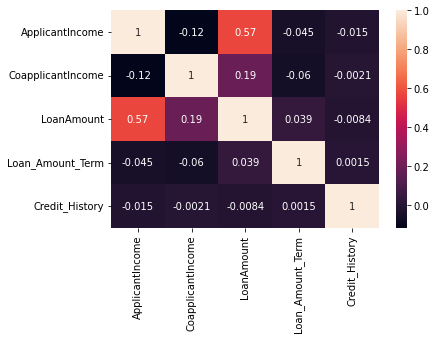

In [18]:
sns.heatmap(dataset.corr(),annot=True)

In [19]:
dataset.corr()['ApplicantIncome']

ApplicantIncome      1.000000
CoapplicantIncome   -0.116605
LoanAmount           0.570909
Loan_Amount_Term    -0.045306
Credit_History      -0.014715
Name: ApplicantIncome, dtype: float64

<AxesSubplot:>

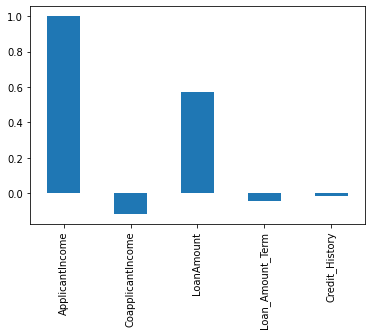

In [20]:
dataset.corr()['ApplicantIncome'].plot(kind='bar')

> Missing Dataset

In [21]:
dataset.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<AxesSubplot:>

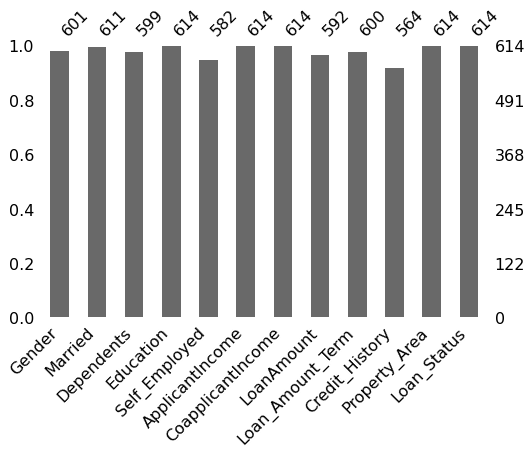

In [22]:
import missingno as msngo
msngo.bar(dataset,figsize=(8,5))

In [23]:
import statistics
dataset['Gender'] = dataset['Gender'].replace(np.nan,statistics.mode(dataset["Gender"]))
dataset['Married'] = dataset['Married'].replace(np.nan,statistics.mode(dataset["Married"]))
dataset['Dependents'] = dataset['Dependents'].replace(np.nan,statistics.mode(dataset["Dependents"]))
dataset['Self_Employed'] = dataset['Self_Employed'].replace(np.nan,statistics.mode(dataset["Self_Employed"]))
dataset['Credit_History'] = dataset['Credit_History'].replace(np.nan,statistics.mode(dataset["Credit_History"]))

dataset['LoanAmount'] = dataset['LoanAmount'].replace(np.nan,dataset['LoanAmount'].median())
dataset['Loan_Amount_Term'] = dataset['Loan_Amount_Term'].replace(np.nan,dataset['Loan_Amount_Term'].median())

> Encoding categorical data

In [24]:
num = dataset.select_dtypes('number').columns.to_list()
cat = dataset.select_dtypes('object').columns.to_list()
loan_num =  dataset[num]
loan_cat =  dataset[cat]

print('numerical columns:')
for cols in loan_num.columns:
  print(cols)

print('********************************************************************** ')

print('categorical columns: ')
for cols2 in loan_cat.columns:
  print(cols2)

numerical columns:
ApplicantIncome
CoapplicantIncome
LoanAmount
Loan_Amount_Term
Credit_History
********************************************************************** 
categorical columns: 
Gender
Married
Dependents
Education
Self_Employed
Property_Area
Loan_Status


In [25]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

dataset['Gender'] = dataset['Gender'].map({'Male':1,'Female':0}) 
dataset['Married'] = dataset['Married'].map({'Yes':1,'No':0}) 
dataset['Education'] = dataset['Education'].map({'Graduate':1,'Not Graduate':0}) 
dataset['Self_Employed'] = dataset['Self_Employed'].map({'Yes':1,'No':0}) 
dataset['Loan_Status'] = dataset['Loan_Status'].map({'Y':1,'N':0}) 
dataset['Property_Area'] = dataset['Property_Area'].map({'Rural':0,'Urban':1,'Semiurban':2}) 

dataset['Dependents'] = le.fit_transform(dataset['Dependents'])

In [26]:
dataset = pd.concat([dataset, pd.get_dummies(dataset['Dependents'], prefix='Dependents')], axis=1)
dataset = pd.concat([dataset, pd.get_dummies(dataset['Property_Area'], prefix='Property_Area')], axis=1)

In [27]:
dataset.drop(['Dependents','Property_Area'],axis=1,inplace=True)

In [28]:
y = dataset['Loan_Status'].values
dataset = dataset.drop('Loan_Status',axis=1,inplace=False)
X = dataset.values

In [29]:
y=np.reshape(y,(y.shape[0],1))

In [30]:
print(X.shape)
print(y.shape)

(614, 16)
(614, 1)


> Feature Selection

In [31]:
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import chi2
print('X Shape :',X.shape)
FeatureSelection = SelectPercentile(score_func = chi2,percentile=60)
X = FeatureSelection.fit_transform(X,y)
print('X Shape :',X.shape)
print('Feature Selected',FeatureSelection.get_support())

X Shape : (614, 16)
X Shape : (614, 9)
Feature Selected [False  True False False  True  True  True  True  True False False  True
 False  True False  True]


In [32]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
print(X[:6,:])

[[-1.37208932e+00  7.29908229e-02 -5.54487330e-01 -2.11241249e-01
   2.73231296e-01  4.11732692e-01 -4.43712848e-01 -6.41478178e-01
  -7.82015701e-01]
 [ 7.28815525e-01 -1.34411954e-01 -3.87315485e-02 -2.11241249e-01
   2.73231296e-01  4.11732692e-01 -4.43712848e-01  1.55889948e+00
  -7.82015701e-01]
 [ 7.28815525e-01 -3.93747337e-01 -5.54487330e-01 -9.48996468e-01
   2.73231296e-01  4.11732692e-01 -4.43712848e-01 -6.41478178e-01
  -7.82015701e-01]
 [ 7.28815525e-01 -4.62062470e-01  2.51979602e-01 -3.06435471e-01
   2.73231296e-01  4.11732692e-01 -4.43712848e-01 -6.41478178e-01
  -7.82015701e-01]
 [-1.37208932e+00  9.77284368e-02 -5.54487330e-01 -5.65506391e-02
   2.73231296e-01  4.11732692e-01 -4.43712848e-01 -6.41478178e-01
  -7.82015701e-01]
 [ 7.28815525e-01  2.21831139e-03  8.80599712e-01  1.44275835e+00
   2.73231296e-01  4.11732692e-01  2.25370981e+00 -6.41478178e-01
  -7.82015701e-01]]


In [33]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=22)
print('X_Train')
print(X_train[:3,:])
print('****************************')
print('X_test')
print(X_test[:3,:])
print(X_test.shape)
print('****************************')
print('Y_train')
print(y_train[:3,:])
print('****************************')
print('Y_test')
print(y_test[:3,:])

X_Train
[[ 0.72881553  1.50384063 -0.55448733  3.45373629  0.2732313   0.41173269
  -0.44371285 -0.64147818  1.2787467 ]
 [-1.37208932 -0.29823721 -0.55448733 -0.59201814  0.2732313   0.41173269
  -0.44371285 -0.64147818 -0.7820157 ]
 [-1.37208932  0.52760591 -0.55448733  0.05054286  0.2732313   0.41173269
  -0.44371285 -0.64147818  1.2787467 ]]
****************************
X_test
[[-1.37208932 -0.50088906 -0.00726634 -0.16364414  0.2732313   0.41173269
  -0.44371285 -0.64147818  1.2787467 ]
 [ 0.72881553 -0.10705314  0.24342927 -0.18744269  0.2732313   0.41173269
  -0.44371285 -0.64147818 -0.7820157 ]
 [ 0.72881553 -0.22173082  1.25886622 -0.09224847  0.2732313   0.41173269
  -0.44371285  1.55889948 -0.7820157 ]]
(185, 9)
****************************
Y_train
[[1]
 [0]
 [1]]
****************************
Y_test
[[1]
 [1]
 [0]]


In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score


lg=LogisticRegression(random_state=22)
CrossValidateValues = cross_validate(lg,X_train,y_train,cv=6,return_train_score = True)
# Showing Results
print('Train Score Value : ', CrossValidateValues['train_score'])
print('Test Score Value : ', CrossValidateValues['test_score'])
print('-----------------------------------------------------------------------------------')

# Showing Results
score_train = cross_val_score(estimator = lg, X = X_train, y = y_train, cv = 6)
print("Cross validation Score is",np.mean(score_train)*100)

Train Score Value :  [0.81512605 0.80112045 0.80112045 0.80446927 0.80726257 0.7849162 ]
Test Score Value :  [0.73611111 0.80555556 0.79166667 0.78873239 0.77464789 0.87323944]
-----------------------------------------------------------------------------------
Cross validation Score is 79.49921752738653


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/con

In [35]:
lg.fit(X_train,y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression(random_state=22)

In [36]:
y_pred_LR=lg.predict(X_test)
print('Y Test   : ',y_test[:5,:].ravel())
print('Y Predict :',y_pred_LR[:5])

Y Test   :  [1 1 0 1 0]
Y Predict : [1 1 1 1 1]


In [37]:
from sklearn.metrics import accuracy_score
accuracy_lg=accuracy_score(y_test,y_pred_LR)
print(accuracy_lg)

0.8540540540540541


[[ 27  25]
 [  2 131]]


<function matplotlib.pyplot.show(close=None, block=None)>

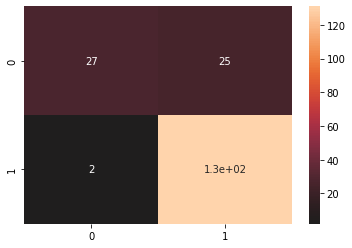

In [38]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred_LR)
print(cm)
sns.heatmap(cm,center=True,annot=True)
plt.show

In [39]:
from sklearn.metrics import classification_report
cr=classification_report(y_test,y_pred_LR)
print(cr)

              precision    recall  f1-score   support

           0       0.93      0.52      0.67        52
           1       0.84      0.98      0.91       133

    accuracy                           0.85       185
   macro avg       0.89      0.75      0.79       185
weighted avg       0.87      0.85      0.84       185



LR_tpr:  [0.         0.48076923 1.        ]
LR_fpr:  [0.         0.98496241 1.        ]
threshold:  [2 1 0]


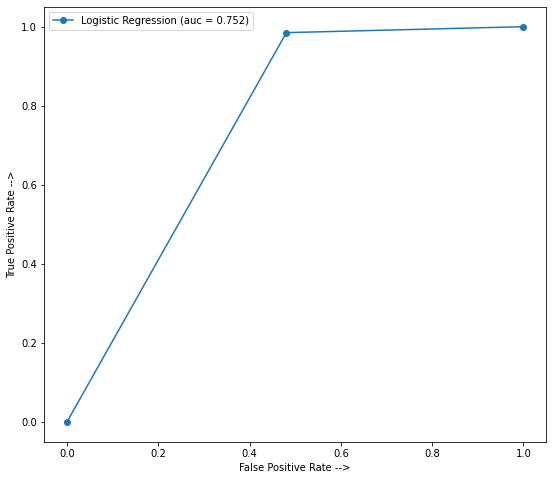

In [40]:
from sklearn.metrics import roc_curve,auc
LR_tpr,LR_fpr,threshold=roc_curve(y_test,y_pred_LR)
LR_auc = auc(LR_tpr, LR_fpr)
print('LR_tpr: ',LR_tpr)
print('LR_fpr: ',LR_fpr)
print('threshold: ',threshold)

#Draw ROC Curve && AUC [Area Under The Curve]
plt.figure(figsize=(9, 8))
plt.plot(LR_tpr, LR_fpr, marker='o', label='Logistic Regression (auc = %0.3f)' % LR_auc)
plt.ylabel('True Positive Rate -->')
plt.xlabel('False Positive Rate -->')

plt.legend()

plt.show()

In [41]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score

s_v_c = SVC(C = 1, kernel='rbf' , random_state=22)
CrossValidateValues_svc = cross_validate(s_v_c,X_train,y_train,cv=8,return_train_score = True)

# Showing Results
print('train Score Value : ', CrossValidateValues_svc['train_score'])
print('Test Score Value : ', CrossValidateValues_svc['test_score'])
#print('//////////////////////////////////////')

# Showing Results
score2_train = cross_val_score(estimator = s_v_c, X = X_train, y = y_train, cv = 8)
print("Cross validation is",np.mean(score2_train)*100)

train Score Value :  [0.832      0.82666667 0.81866667 0.824      0.816      0.80851064
 0.81648936 0.81914894]
Test Score Value :  [0.68518519 0.7962963  0.75925926 0.7962963  0.77777778 0.8490566
 0.81132075 0.83018868]
Cross validation is 78.8172606568833


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/con

In [42]:
s_v_c.fit(X_train,y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVC(C=1, random_state=22)

In [43]:
y_pred_svc=s_v_c.predict(X_test)
print('Y Test: ',y_test[:5,:])
print('Y Predict: ,',y_pred_svc[:5,])

Y Test:  [[1]
 [1]
 [0]
 [1]
 [0]]
Y Predict: , [1 1 1 1 1]


In [44]:
from sklearn.metrics import accuracy_score
accuracy_s=accuracy_score(y_test,y_pred_svc)
print(accuracy_s)

0.8162162162162162


[[ 24  28]
 [  6 127]]


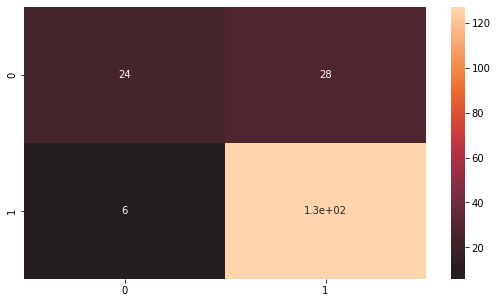

In [45]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred_svc)
print(cm)
plt.figure(figsize=(9,5))
sns.heatmap(cm,center=True,annot=True)
plt.show()

In [46]:
from sklearn.metrics import classification_report
cr=classification_report(y_test,y_pred_svc)
print(cr)

              precision    recall  f1-score   support

           0       0.80      0.46      0.59        52
           1       0.82      0.95      0.88       133

    accuracy                           0.82       185
   macro avg       0.81      0.71      0.73       185
weighted avg       0.81      0.82      0.80       185



svm_tpr [0.         0.53846154 1.        ]
svm_fpr [0.         0.95488722 1.        ]
threshold [2 1 0]


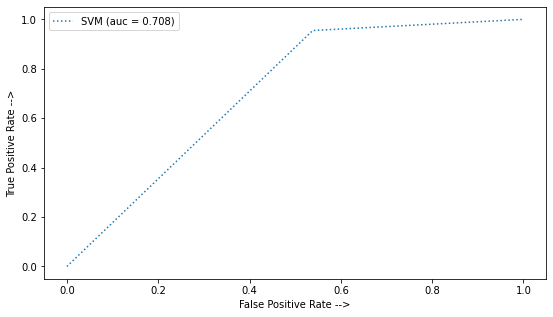

In [47]:
from sklearn.metrics import roc_curve,auc
svm_tpr,svm_fpr,threshold=roc_curve(y_test,y_pred_svc)
svm_auc=auc(svm_tpr,svm_fpr)
print('svm_tpr',svm_tpr)
print('svm_fpr',svm_fpr)
print('threshold',threshold)


#Draw ROC Curve && AUC [Area Under The Curve]
plt.figure(figsize=(9, 5))
plt.plot(svm_tpr, svm_fpr, linestyle=':', label='SVM (auc = %0.3f)' % svm_auc)

plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')

plt.legend()

plt.show()

In [48]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score

knn = KNeighborsClassifier(n_neighbors = 15,weights='uniform')
CrossValidateValues_knn = cross_validate(knn,X_train,y_train,cv = 6,return_train_score = True) 

print('train Score Value : ', CrossValidateValues_knn['train_score'])
print('Test Score Value : ', CrossValidateValues_knn['test_score'])


# Showing Results

# Showing Results
score3_train = cross_val_score(estimator = knn, X = X_train, y = y_train, cv = 6)
print("Cross validation is",np.mean(score3_train)*100)


train Score Value :  [0.80392157 0.78991597 0.79551821 0.79888268 0.79888268 0.77932961]
Test Score Value :  [0.72222222 0.79166667 0.79166667 0.8028169  0.74647887 0.87323944]
Cross validation is 78.80151278038602


/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when

In [49]:
knn.fit(X_train,y_train)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """Entry point for launching an IPython kernel.


KNeighborsClassifier(n_neighbors=15)

In [50]:
y_pred_knn=knn.predict(X_test)
print('Y Test:',y_test[:5,:])
print('Y Predict:',y_pred_knn[:5,])

Y Test: [[1]
 [1]
 [0]
 [1]
 [0]]
Y Predict: [1 1 1 1 1]


In [51]:
from sklearn.metrics import accuracy_score
accuracy_knn=accuracy_score(y_test,y_pred_knn)
print('Accuracy Score:',accuracy_knn)

Accuracy Score: 0.8324324324324325


[[ 22  30]
 [  1 132]]


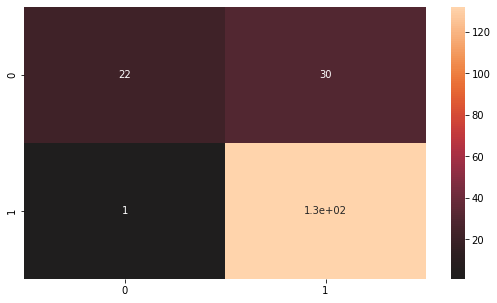

In [52]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred_knn)
print(cm)
plt.figure(figsize=(9,5))
sns.heatmap(cm,center=True,annot=True)
plt.show()

In [53]:
from sklearn.metrics import classification_report
cr=classification_report(y_test,y_pred_knn)
print(cr)

              precision    recall  f1-score   support

           0       0.96      0.42      0.59        52
           1       0.81      0.99      0.89       133

    accuracy                           0.83       185
   macro avg       0.89      0.71      0.74       185
weighted avg       0.85      0.83      0.81       185



knn_tpr [0.         0.57692308 1.        ]
knn_fpr [0.        0.9924812 1.       ]
threhold [2 1 0]


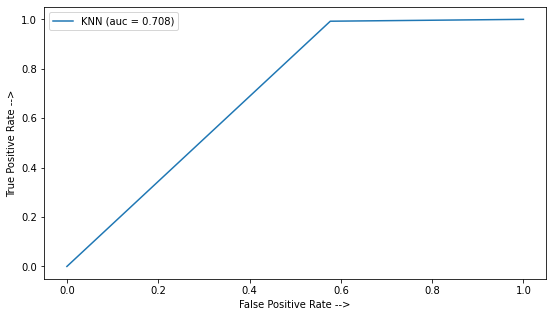

In [54]:
from sklearn.metrics import roc_curve,auc
knn_tpr,knn_fpr,threshold=roc_curve(y_test,y_pred_knn)
knn_auc=auc(knn_tpr,knn_fpr)
print('knn_tpr',knn_tpr)
print('knn_fpr',knn_fpr)
print('threhold',threshold)

plt.figure(figsize=(9,5))
plt.plot(knn_tpr,knn_fpr,linestyle='-', label='KNN (auc = %0.3f)' % knn_auc)

plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')

plt.legend()

plt.show()

In [55]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score

dt=DecisionTreeClassifier(criterion = 'gini',random_state=22,max_depth=3)
CrossValidateValues_dt = cross_validate(dt,X_train,y_train,cv =6,return_train_score = True) 

print('train Score Value : ', CrossValidateValues_dt['train_score'])
print('Test Score Value : ', CrossValidateValues_dt['test_score'])

#print('//////////////////////////////////////')

# Showing Results

# Showing Results
score4_train = cross_val_score(estimator = dt, X = X_train, y = y_train, cv = 6)
print("Cross validation is",np.mean(score4_train)*100)

train Score Value :  [0.82633053 0.80952381 0.81512605 0.81005587 0.81284916 0.79329609]
Test Score Value :  [0.72222222 0.77777778 0.77777778 0.8028169  0.76056338 0.87323944]
Cross validation is 78.57329160146061


In [56]:
dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=22)

In [57]:
y_pred_dt=dt.predict(X_test)
print('Y Test: ',y_test[:5,:])
print('Y Pred',y_pred_dt[:5,])

Y Test:  [[1]
 [1]
 [0]
 [1]
 [0]]
Y Pred [1 1 1 1 1]


In [58]:
from sklearn.metrics import accuracy_score
accuracy_dt=accuracy_score(y_test,y_pred_dt)
print('Accuracy Score',accuracy_dt)

Accuracy Score 0.8378378378378378


[[ 23  29]
 [  1 132]]


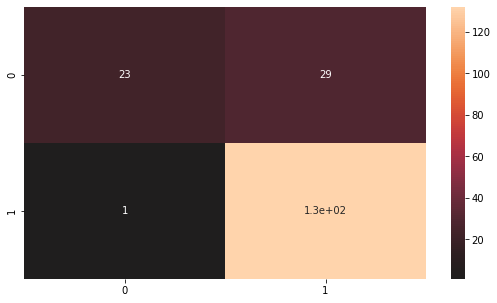

In [59]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred_dt)
print(cm)
plt.figure(figsize=(9,5))
sns.heatmap(cm,center=True,annot=True)
plt.show()

In [60]:
from sklearn.metrics import classification_report
cr=classification_report(y_test,y_pred_dt)
print(cr)

              precision    recall  f1-score   support

           0       0.96      0.44      0.61        52
           1       0.82      0.99      0.90       133

    accuracy                           0.84       185
   macro avg       0.89      0.72      0.75       185
weighted avg       0.86      0.84      0.82       185



dt_tpr Value  :  [0.         0.55769231 1.        ]
dt_fpr Value  :  [0.        0.9924812 1.       ]
thresholds Value  :  [2 1 0]


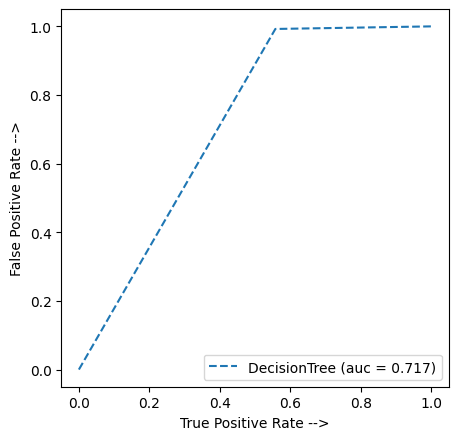

In [61]:
from sklearn.metrics import roc_curve,auc
dt_tpr,dt_fpr,threshold=roc_curve(y_test,y_pred_dt)
dt_auc=auc(dt_tpr,dt_fpr)
print('dt_tpr Value  : ', dt_tpr)
print('dt_fpr Value  : ', dt_fpr)
print('thresholds Value  : ', threshold)

#Draw ROC Curve && AUC [Area Under The Curve]

plt.figure(figsize=(5, 5), dpi=100)
plt.plot(dt_tpr, dt_fpr, linestyle='--', label='DecisionTree (auc = %0.3f)' % dt_auc)

plt.xlabel('True Positive Rate -->')
plt.ylabel('False Positive Rate -->')

plt.legend()
plt.show()

In [62]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score

rf=RandomForestClassifier(criterion = 'entropy',random_state=22,max_depth=3,n_estimators = 100)
CrossValidateValues_rf = cross_validate(rf,X_train,y_train,cv = 6,return_train_score = True) 

print('train Score Value : ', CrossValidateValues_rf['train_score'])
print('Test Score Value : ', CrossValidateValues_rf['test_score'])

#print('//////////////////////////////////////')

# Showing Results

# Showing Results
score5_train = cross_val_score(estimator =rf, X = X_train, y = y_train, cv = 6)
print("Cross validation is",np.mean(score5_train)*100)

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 

train Score Value :  [0.81232493 0.79831933 0.80672269 0.79608939 0.80446927 0.7849162 ]
Test Score Value :  [0.73611111 0.80555556 0.79166667 0.8028169  0.77464789 0.87323944]


/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 

Cross validation is 79.7339593114241


In [63]:
rf.fit(X_train,y_train)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(criterion='entropy', max_depth=3, random_state=22)

In [64]:
y_pred_rf=rf.predict(X_test)
print('Y Test: ',y_test[:5,:])
print('Y Pred',y_pred_rf[:5,])

Y Test:  [[1]
 [1]
 [0]
 [1]
 [0]]
Y Pred [1 1 1 1 1]


In [65]:
from sklearn.metrics import accuracy_score
accuracy_rf=accuracy_score(y_test,y_pred_rf)
print('Accuracy Score',accuracy_rf)

Accuracy Score 0.8324324324324325


[[ 24  28]
 [  3 130]]


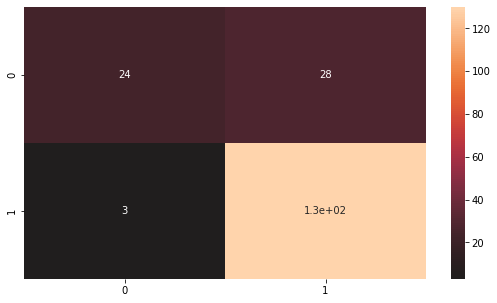

In [66]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred_rf)
print(cm)
plt.figure(figsize=(9,5))
sns.heatmap(cm,center=True,annot=True)
plt.show()

In [67]:
from sklearn.metrics import classification_report
cr=classification_report(y_test,y_pred_rf)
print(cr)

              precision    recall  f1-score   support

           0       0.89      0.46      0.61        52
           1       0.82      0.98      0.89       133

    accuracy                           0.83       185
   macro avg       0.86      0.72      0.75       185
weighted avg       0.84      0.83      0.81       185



rf_tpr Value  :  [0.         0.53846154 1.        ]
rf_fpr Value  :  [0.         0.97744361 1.        ]
thresholds Value  :  [2 1 0]


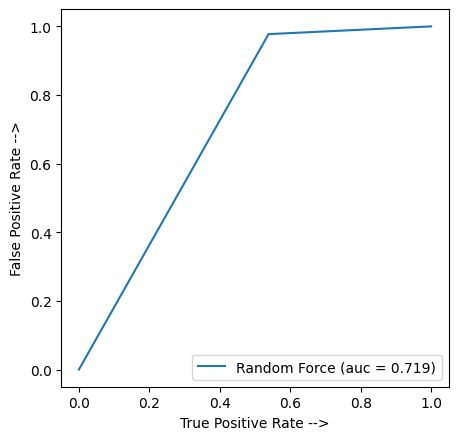

In [68]:
from sklearn.metrics import roc_curve,auc
rf_tpr,rf_fpr,threshold=roc_curve(y_test,y_pred_rf)
rf_auc=auc(rf_tpr,rf_fpr)
print('rf_tpr Value  : ', rf_tpr)
print('rf_fpr Value  : ', rf_fpr)
print('thresholds Value  : ', threshold)

#Draw ROC Curve && AUC [Area Under The Curve]

plt.figure(figsize=(5, 5), dpi=100)
plt.plot(rf_tpr, rf_fpr, linestyle='-', label='Random Force (auc = %0.3f)' % rf_auc)

plt.xlabel('True Positive Rate -->')
plt.ylabel('False Positive Rate -->')

plt.legend()
plt.show()

In [69]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score

NB=BernoulliNB()
CrossValidateValues_nb = cross_validate(NB,X_train,y_train,cv = 5,return_train_score = True) 

print('train Score Value : ', CrossValidateValues_nb['train_score'])
print('Test Score Value : ', CrossValidateValues_nb['test_score'])

#print('//////////////////////////////////////')

# Showing Results

# Showing Results
score6_train = cross_val_score(estimator =NB, X = X_train, y = y_train, cv = 6)
print("Cross validation is",np.mean(score6_train)*100)

train Score Value :  [0.80466472 0.79300292 0.79883382 0.79300292 0.78488372]
Test Score Value :  [0.74418605 0.81395349 0.77906977 0.80232558 0.83529412]
Cross validation is 78.5602503912363


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/con

In [70]:
NB.fit(X_train,y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


BernoulliNB()

In [71]:
y_pred_NB = NB.predict(X_test)
y_pred_prob = NB.predict_proba(X_test)
y_pred_prob=y_pred_prob.astype(int)
print('Y Test \n' ,y_test[:10,:])
print('Predicted Value for BernoulliNBModel is :\n ' , y_pred_NB[:10,])
print('Prediction Probabilities Value for BernoulliNBModel is : \n' , y_pred_prob[:10,:])

Y Test 
 [[1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]]
Predicted Value for BernoulliNBModel is :
  [1 1 1 1 1 0 1 1 1 0]
Prediction Probabilities Value for BernoulliNBModel is : 
 [[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]]


In [72]:
from sklearn.metrics import accuracy_score
accuracy_nb=accuracy_score(y_test,y_pred_NB)
print(accuracy_nb)

0.8594594594594595


[[ 28  24]
 [  2 131]]


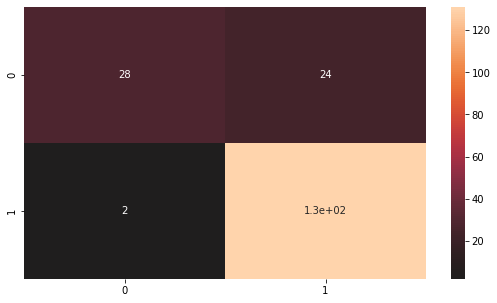

In [73]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred_NB)
print(cm)
plt.figure(figsize=(9,5))
sns.heatmap(cm,center=True,annot=True)
plt.show()

In [74]:
from sklearn.metrics import classification_report
cr=classification_report(y_test,y_pred_NB)
print(cr)

              precision    recall  f1-score   support

           0       0.93      0.54      0.68        52
           1       0.85      0.98      0.91       133

    accuracy                           0.86       185
   macro avg       0.89      0.76      0.80       185
weighted avg       0.87      0.86      0.85       185



nb_tpr Value  :  [0.         0.46153846 1.        ]
nb_fpr Value  :  [0.         0.98496241 1.        ]
thresholds Value  :  [2 1 0]


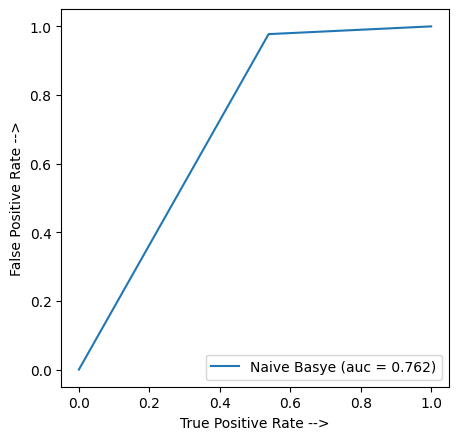

In [75]:
from sklearn.metrics import roc_curve,auc
nb_tpr,nb_fpr,threshold=roc_curve(y_test,y_pred_NB)
nb_auc=auc(nb_tpr,nb_fpr)
print('nb_tpr Value  : ', nb_tpr)
print('nb_fpr Value  : ', nb_fpr)
print('thresholds Value  : ', threshold)

#Draw ROC Curve && AUC [Area Under The Curve]

plt.figure(figsize=(5, 5), dpi=100)
plt.plot(rf_tpr, rf_fpr, linestyle='-', label='Naive Basye (auc = %0.3f)' % nb_auc)

plt.xlabel('True Positive Rate -->')
plt.ylabel('False Positive Rate -->')

plt.legend()
plt.show()

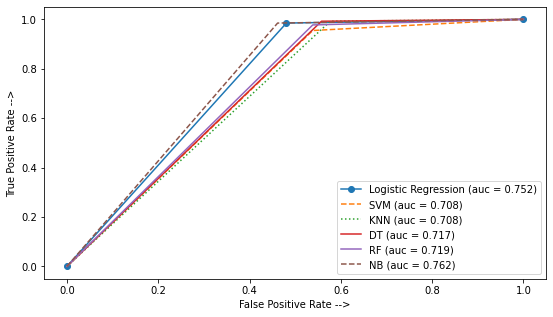

In [76]:
from sklearn.metrics import roc_curve, auc

LR_tpr,LR_fpr,threshold=roc_curve(y_test,y_pred_LR)
LR_auc = auc(LR_tpr, LR_fpr)

svm_fpr, svm_tpr, threshold = roc_curve(y_test, y_pred_svc)
auc_svm = auc(svm_fpr, svm_tpr)

knn_fpr, knn_tpr, threshold = roc_curve(y_test, y_pred_knn)
auc_knn = auc(knn_fpr, knn_tpr)

dt_fpr, dt_tpr, threshold = roc_curve(y_test, y_pred_dt)
auc_dt = auc(dt_fpr, dt_tpr)

rf_fpr, rf_tpr, threshold = roc_curve(y_test, y_pred_rf)
auc_rf = auc(rf_fpr, rf_tpr)


nb_fpr, nb_tpr, threshold = roc_curve(y_test, y_pred_NB)
auc_nb = auc(nb_fpr, nb_tpr)

plt.figure(figsize=(9, 5))
plt.plot(LR_tpr, LR_fpr, marker='o', label='Logistic Regression (auc = %0.3f)' % LR_auc)
plt.plot(svm_fpr, svm_tpr, linestyle='--', label='SVM (auc = %0.3f)' % auc_svm)
plt.plot(knn_fpr, knn_tpr, linestyle=':', label='KNN (auc = %0.3f)' % auc_knn)
plt.plot(dt_fpr, dt_tpr, linestyle='-', label='DT (auc = %0.3f)' % auc_dt)
plt.plot(rf_fpr, rf_tpr, linestyle='-', label='RF (auc = %0.3f)' % auc_rf)
plt.plot(nb_fpr, nb_tpr, linestyle='--', label='NB (auc = %0.3f)' % auc_nb)



plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')

plt.legend()

In [77]:
models = pd.DataFrame({
    'Model': ['Logistic Regression','Support Vector Machines', 'KNN','Decision Tree', 
              'Random Forest', 'Naive Bayes'],
    'Score': [accuracy_lg, accuracy_s, accuracy_knn, 
              accuracy_dt, accuracy_rf, accuracy_nb]})
models.sort_values(by='Score', ascending=False)

,Model,Score
5,Naive Bayes,0.859459
0,Logistic Regression,0.854054
3,Decision Tree,0.837838
2,KNN,0.832432
4,Random Forest,0.832432
1,Support Vector Machines,0.816216
